In [1]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/Sleep data"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X_time = X.copy()
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])




All patients shuffled
           time         x         y         z  heartbeat  label
20926  19230.0  0.206345 -0.244812  0.954010       59.0      2
16227  26310.0 -0.507706 -0.207413  0.841400       56.0      2
4043   10680.0 -0.097290  0.403870 -0.913513       71.0      3
9044   21030.0 -0.329666 -0.212326  0.916275       55.0      2
1567   16530.0 -0.418625 -0.291031 -0.854919       47.0      2
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
20926  19230.0  0.206345 -0.244812  0.954010   0.202247      2
16227  26310.0 -0.507706 -0.207413  0.841400   0.168539      2
4043   10680.0 -0.097290  0.403870 -0.913513   0.337079      3
9044   21030.0 -0.329666 -0.212326  0.916275   0.157303      2
1567   16530.0 -0.418625 -0.291031 -0.854919   0.067416      2
X data 
 [[ 0.2063446  -0.244812    0.95401     0.20224719]
 [-0.5077057  -0.2074127   0.8414001   0.16853933]
 [-0.09729     0.4038696  -0.9135132   0.33

In [15]:
kf = KFold(15)

#Random_Forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy


Accuracy_list_train = []
Accuracy_list_test = []
Fold = []
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    Random_Forest_model = RandomForestClassifier(n_estimators = 30, criterion = "entropy")
    Random_Forest_model.fit(X_train,y_train)

    y_pred_test = Random_Forest_model.predict(X_test)
    y_pred_train = Random_Forest_model.predict(X_train)

    accuracy_test = accuracy_score(y_test,y_pred_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)

    Accuracy_list_test.append(accuracy_test)
    Accuracy_list_train.append(accuracy_train)
    Fold.append(fold)

    print(f"Fold #{fold}, Training Size: {len(X_train)}, Validation Size: {len(X_test)}")
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred)) 
    print('Accuracy test: %.2f' % accuracy_score(y_test, y_pred_test))

    fold += 1
    

Fold #1, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #2, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #3, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.79
Fold #4, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #5, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.82
Fold #6, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #7, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.79
Fold #8, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #9, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #10, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.79
Fold #11, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.80
Fold #12, Training Size: 24063, Validation Size: 1718
Accuracy test: 0.79
Fold #13, Training Size: 24063, Validation Size: 1718
Accuracy test: 0.80
Fold #14, Training Size: 24063, Validation Size

In [16]:
kf = KFold(15)

#Random_Forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy


Accuracy_list_train_time = []
Accuracy_list_test_time = []
for train_index, test_index in kf.split(X_time,y):
    X_train, X_test = X_time[train_index], X_time[test_index]
    y_train, y_test = y[train_index], y[test_index]

    Random_Forest_model = RandomForestClassifier(n_estimators = 30, criterion = "entropy")
    Random_Forest_model.fit(X_train,y_train)

    y_pred_test = Random_Forest_model.predict(X_test)
    y_pred_train = Random_Forest_model.predict(X_train)

    accuracy_test = accuracy_score(y_test,y_pred_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)

    Accuracy_list_test_time.append(accuracy_test)
    Accuracy_list_train_time.append(accuracy_train)

    print(f"Fold #{fold}, Training Size: {len(X_train)}, Validation Size: {len(X_test)}")
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred)) 
    print('Accuracy test: %.2f' % accuracy_score(y_test, y_pred_test))

    fold += 1
    

Fold #1, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #2, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.88
Fold #3, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #4, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.88
Fold #5, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #6, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.88
Fold #7, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.86
Fold #8, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #9, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #10, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.87
Fold #11, Training Size: 24062, Validation Size: 1719
Accuracy test: 0.88
Fold #12, Training Size: 24063, Validation Size: 1718
Accuracy test: 0.86
Fold #13, Training Size: 24063, Validation Size: 1718
Accuracy test: 0.87
Fold #14, Training Size: 24063, Validation Size

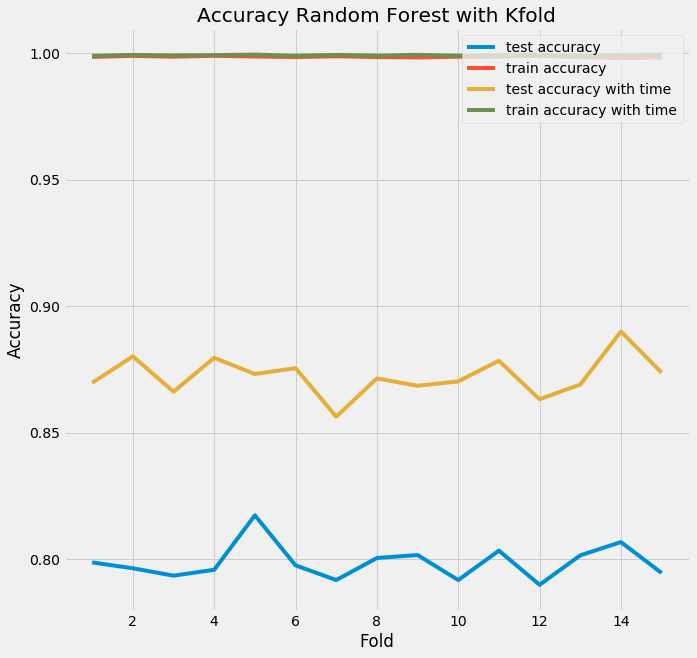

In [23]:
fig = plt.figure(figsize=(10,10)) 
plt.plot(Fold,Accuracy_list_test, label = "test accuracy")
plt.plot(Fold,Accuracy_list_train, label = "train accuracy")
plt.plot(Fold,Accuracy_list_test_time, label = "test accuracy with time")
plt.plot(Fold,Accuracy_list_train_time, label = "train accuracy with time")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Random Forest with Kfold")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


In [0]:
from matplotlib.pyplot import savefig
fig.savefig('/content/drive/My Drive/RandomForestwithKfoldfinal.png', transparent=True)